<a href="https://colab.research.google.com/github/maxkleiner/maXbox4/blob/master/MNISTSinglePredict2Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Single Multi Prediction
For this tutor we’ll explore one of the classic machine learning datasets – hand written digits classification. We have set up a very simple SVC to classify the MNIST digits to make one single predict.
First we load the libraries and the dataset:

In [19]:
#sign:max: MAXBOX8: 13/03/2021 07:46:37 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# [height, weight, 8*8 pixels of digits 0..9]
dimages = datasets.load_digits()
print(type(dimages), len(dimages.data), 'samples')


<class 'sklearn.utils.Bunch'> 1797 samples


The **dataset** **()** is available either for download from the UCI ML repository or via a Python library scikit-learn dataset. Then we setup the Support Vector Classifier with the training data X and the target y:

In [21]:
sclf = SVC(gamma=0.001, C=100, kernel='linear')

X= dimages.data[:-10]
y= dimages.target[:-10]
print('train set samples:',len(X))


train set samples: 1787


Gamma is the learning rate and the higher the value of gamma the more precise the decision boundary would be. C (regularization) is the penalty of the fault tolerance. Having a larger C will lead to smaller values for the slack variables. This means that the number of support vectors will decrease. When you run the prediction, it will need to calculate the indicator function for each support vector. Now we train (fit) the samples:

In [22]:
sclf.fit(X,y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In the last step we predict a specific digit from the test set (only the last 10 samples are unseen), means we pass an actual image and SVC makes the prediction of which digit belongs to the image:

the image maybe belongs to  [9]


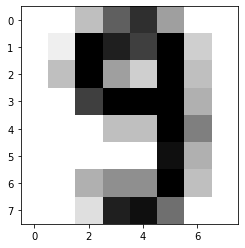

In [23]:
testimage = -5

s_prediction = sclf.predict([dimages.data[testimage]])
print ('the image maybe belongs to ',s_prediction)
plt.imshow(dimages.images[testimage], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

The same fit we try with a Random Forest Classifier to finish the first step of this lesson:

In [24]:
#RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X,y)
rfc_prediction = rfc_clf.predict([dimages.data[testimage]])
print ('predict with RFC ',rfc_prediction)

predict with RFC  [9]


There are many ways to improve this predict, including not using a vector classifier and go further with a neural classifier, but here’s a simple one to start what we do. Let’s just simplify our images by making them true black and white and stack an array.

# MNIST Multi Prediction 
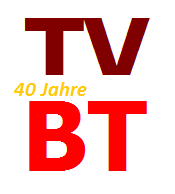

Now we split explicit data in train- and test-set. Splitting the given images in 80:20 ratio so that 80% image is available for training and 20 % image is available for testing. We consider the data as pixels and the target as labels.

Convert and create the dataframe from datasets. We are using support vector machines for classification. Fit method trains the model and score will test it against the given test set and score.

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimensional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [26]:
#df = pd.DataFrame(data=dimages.data, columns=dimages.feature_names)
df = pd.DataFrame(data=dimages.data)
print(df.head(5))
df['target'] = pd.Series(dimages.target)
#df['pixels'] = dimages.data[:,1:64] #pd.Series(dimages.data[:,1:785])
print(df['target'])
print(df.shape) #print(df.info)
 
pixels = df
labels = df.target
print('pixels ',pixels)

    0    1    2     3     4     5    6   ...   57   58    59    60    61   62   63
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  ...  0.0  6.0  13.0  10.0   0.0  0.0  0.0
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  ...  0.0  0.0  11.0  16.0  10.0  0.0  0.0
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  ...  0.0  0.0   3.0  11.0  16.0  9.0  0.0
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  ...  0.0  7.0  13.0  13.0   9.0  0.0  0.0
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  ...  0.0  0.0   2.0  16.0   4.0  0.0  0.0

[5 rows x 64 columns]
0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64
(1797, 65)
pixels          0    1     2     3     4     5  ...    59    60    61   62   63  target
0     0.0  0.0   5.0  13.0   9.0   1.0  ...  13.0  10.0   0.0  0.0  0.0       0
1     0.0  0.0   0.0  12.0  13.0   5.0  ...  11.0  16.0  10.0  0.0  0.0       1
2     0.0  0.0   0.0   4.0  15.0  12.0  ...   3.0  11.0  16.0  9.0  0

We are ready for splitting the given images in 80:20 ratio so that 80% image is available for training and 20 % image as unseen or unknown is available for testing.

In [30]:
train_images, test_images, train_labels, test_labels = \
             train_test_split(pixels,labels,train_size=0.8,random_state=2);

print('train size: ',len(train_images), len(train_labels))                
print('test size: ',len(test_images), len(test_labels))  
 
sclf.fit(train_images, train_labels)
print('test score ',sclf.score(test_images,test_labels))

train size:  1437 1437
test size:  360 360
test score  0.9777777777777777


This gives us the score of 97 percent ( 0.977777 ) which is at all a good score. We would try to increase the accuracy but this is sort of challenge.

The dataset description of our primer says: Each image is 8 pixels in height and 8 pixels in width, for a total of 64 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Would be nice to get the confusion matrix of MNIST dataset to get an impression of the score.

In [32]:
from sklearn.metrics import confusion_matrix
test_predictions = sclf.predict(test_images)
#print(confusion_matrix(test_labels,np.argmax(test_predictions,axis=1)))
print(confusion_matrix(test_labels, test_predictions))

[[32  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  1  2  0]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  1  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 34  2]
 [ 0  0  0  0  0  1  0  1  0 26]]


Splitting the given images in 70:30 ratio shows a slight different confusion matrix so that 70% image is available for training and 30 % image as unseen or unknown is available for testing. Number 8 has probably most problems to get recognized! So disguise as 8 you can be a 6 or 9 and thats logical cause the 8 is in a 7-segment LCD display the base pattern! In german we say that with the word Achtung ;-).

In [35]:
train_images, test_images, train_labels, test_labels = \
             train_test_split(pixels,labels,train_size=0.7,random_state=2);

sclf.fit(train_images, train_labels)
print('test score ',sclf.score(test_images,test_labels))
test_predictions = sclf.predict(test_images)
print(confusion_matrix(test_labels, test_predictions))

test score  0.975925925925926
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  2  0  0  0  0]
 [ 0  0  0  0 50  0  0  1  2  0]
 [ 0  0  0  0  0 58  0  0  0  1]
 [ 0  1  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  2  0  0  0  0  1  0 43  1]
 [ 0  0  0  0  0  1  0  1  0 42]]
